In [36]:
import pandas_datareader as pdr
key="fc8e0806736dc00dc38d3ad9fd7f3f20a73d55af"

In [37]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [38]:
df.to_csv('AAPL.csv')

In [74]:
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
df=pd.read_csv('AAPL.csv')

In [41]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-02-28 00:00:00+00:00,136.99,137.4350,136.7000,137.080,23482860,32.330164,32.435186,32.261723,32.351404,93931440,0.0,1.0
1,AAPL,2017-03-01 00:00:00+00:00,139.79,140.1500,137.5950,137.890,36414585,32.990975,33.075936,32.472946,32.542568,145658340,0.0,1.0
2,AAPL,2017-03-02 00:00:00+00:00,138.96,140.2786,138.7600,140.000,26210984,32.795092,33.106286,32.747891,33.040536,104843936,0.0,1.0
3,AAPL,2017-03-03 00:00:00+00:00,139.78,139.8300,138.5900,138.780,21571121,32.988615,33.000415,32.707770,32.752611,86284484,0.0,1.0
4,AAPL,2017-03-06 00:00:00+00:00,139.34,139.7700,138.5959,139.365,21750044,32.884773,32.986255,32.709163,32.890673,87000176,0.0,1.0


In [42]:
df1=df['close']

In [43]:
df1

0       136.99
1       139.79
2       138.96
3       139.78
4       139.34
         ...  
1254    167.30
1255    164.32
1256    160.07
1257    162.74
1258    164.85
Name: close, Length: 1259, dtype: float64

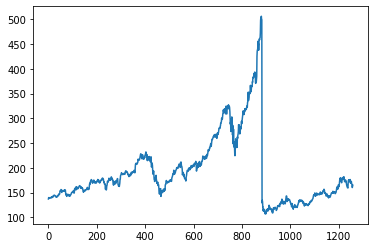

In [44]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [45]:
import numpy as np

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [47]:
print(df1)

[[0.07551659]
 [0.08252974]
 [0.08045085]
 ...
 [0.13332498]
 [0.14001252]
 [0.14529743]]


In [48]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [49]:
training_size,test_size

(818, 441)

In [50]:
train_data

array([[0.07551659],
       [0.08252974],
       [0.08045085],
       [0.0825047 ],
       [0.08140263],
       [0.08185348],
       [0.08055103],
       [0.07974953],
       [0.08090169],
       [0.08105197],
       [0.08052599],
       [0.08420789],
       [0.08478397],
       [0.08303068],
       [0.08671259],
       [0.08265498],
       [0.0866124 ],
       [0.08536005],
       [0.08465874],
       [0.08525986],
       [0.09257358],
       [0.09337508],
       [0.09289919],
       [0.09222292],
       [0.09232311],
       [0.09500313],
       [0.09312461],
       [0.09222292],
       [0.09142142],
       [0.09099562],
       [0.08713838],
       [0.08756418],
       [0.08568566],
       [0.08763932],
       [0.08606137],
       [0.08475892],
       [0.08916719],
       [0.08874139],
       [0.09217282],
       [0.094402  ],
       [0.09227301],
       [0.09254853],
       [0.09219787],
       [0.09953663],
       [0.101866  ],
       [0.10073889],
       [0.0994114 ],
       [0.105

In [51]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [52]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [53]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [54]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [55]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [57]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [58]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 322ms/step - loss: 0.0282 - val_loss: 0.0041
Epoch 2/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0058 - val_loss: 0.0086
Epoch 3/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0028 - val_loss: 0.0011
Epoch 4/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0014 - val_loss: 2.5404e-04
Epoch 5/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0011 - val_loss: 2.4303e-04
Epoch 6/100
12/12 [==============================] - 2s 202ms/step - loss: 9.8785e-04 - val_loss: 3.6296e-04
Epoch 7/100
12/12 [==============================] - 2s 203ms/step - loss: 9.0748e-04 - val_loss: 3.2623e-04
Epoch 8/100
12/12 [==============================] - 2s 198ms/step - loss: 8.7129e-04 - val_loss: 3.3869e-04
Epoch 9/100
12/12 [==============================] - 2s 201ms/step - loss: 8.3081e-04 - val_loss: 2.4146e-04
Epoch 10/100
12/12 [==============================]

In [60]:
train_predict=model.predict(X_train)


In [61]:
test_predict=model.predict(X_test)

In [62]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [63]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

213.1448613372353

In [64]:
math.sqrt(mean_squared_error(ytest,test_predict))

145.00053614897712

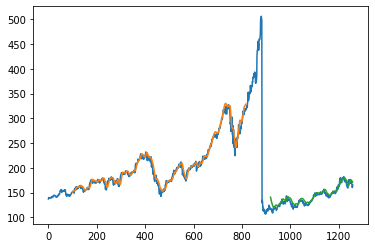

In [65]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [68]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [69]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [71]:
temp_input

[0.08583594239198494,
 0.08806512210394485,
 0.09129618033813391,
 0.09031934877896053,
 0.09009392611145894,
 0.0868378209142141,
 0.08533500313087033,
 0.09247338760175322,
 0.09517845961177201,
 0.09946149029430179,
 0.10499686912961798,
 0.10624921728240444,
 0.10680025046963049,
 0.10482154038822789,
 0.10469630557294918,
 0.10639949906073881,
 0.10522229179711956,
 0.11453976205385091,
 0.10760175328741389,
 0.10549780839073258,
 0.10815278647463994,
 0.11183469004383217,
 0.1105072010018785,
 0.11130870381966185,
 0.10920475892298054,
 0.11013149655604254,
 0.10289292423293667,
 0.10276768941765807,
 0.10807764558547273,
 0.10810269254852845,
 0.11060738885410137,
 0.11684408265497809,
 0.12781465247338758,
 0.13452723857232307,
 0.13570444583594238,
 0.13668127739511576,
 0.13800876643706944,
 0.12515967438948022,
 0.1337507827175955,
 0.14642454602379462,
 0.14509705698184094,
 0.14256731371321218,
 0.1377582968065122,
 0.146474639949906,
 0.1611521603005635,
 0.17092047589229

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
       
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
     
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
      
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [76]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

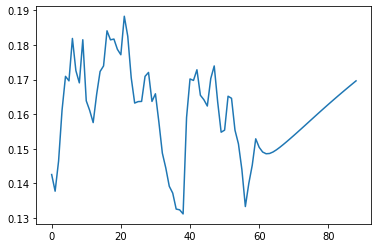

In [78]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [79]:
df3=scaler.inverse_transform(df3).tolist()

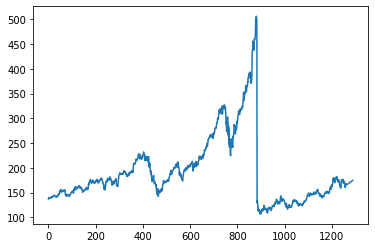

In [80]:
plt.plot(df3)